# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.



## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [261]:
# Load pickled data
import pickle
import numpy as np

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

original_y_train = y_train
setOfLabels = set(y_train)
X_train_mean = np.mean(X_train)

# Free up memory
del train  
del test

In [262]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

print('Labels One-Hot Encoded')

Labels One-Hot Encoded


In [263]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(y_train[0])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


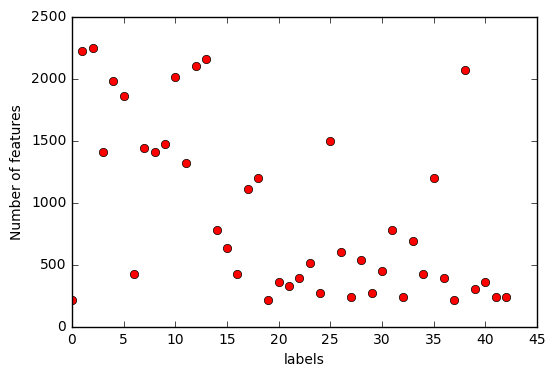

In [264]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

labelDistribution = {}
for label in setOfLabels:
    for idx, val in enumerate(X_train):
        if original_y_train[idx] == label:
            if label in labelDistribution:
                labelDistribution[label] += 1
            else:
                labelDistribution[label] = 1

labelArray = []
featureCountByLabelArray = []
for key, value in labelDistribution.items():
    labelArray.append(key)
    featureCountByLabelArray.append(value)

plt.plot(labelArray,featureCountByLabelArray,'ro')
plt.ylabel('Number of features')
plt.xlabel('labels')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [265]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    output_array = []
    a = 0.1
    b = 0.9
    x_max = 255
    x_min = 0

    return  a+(((image_data - x_min)*(b - a))/(x_max - x_min)) 

X_train = np.mean(X_train, axis=3)
X_train = normalize_greyscale(X_train)
X_test = np.mean(X_test, axis=3)
X_test = normalize_greyscale(X_test)

In [266]:
### Early placeholder code to use a smaller set of data.
### Currently unused.

# fractionOfData = 0.20
# roundedXTrainNumber = round(n_train*fractionOfData)
# trainIdx = np.random.choice(X_train.shape[0], size=roundedXTrainNumber,replace=False)
# roundedXTestNumber = round(n_test*fractionOfData)
# testIdx = np.random.choice(X_test.shape[0], size=roundedXTestNumber,replace=False)

# X_train = X_train[trainIdx, :]
# y_train = y_train[trainIdx, :]
# X_test = X_test[testIdx, :]
# y_test = y_test[testIdx, :]

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [267]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

# Get randomized datasets for training and validation
X_train_features, X_valid_features, y_train_labels, y_valid_labels = train_test_split(
    X_train,
    y_train,
    test_size=0.10,
    random_state=0)

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [268]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten
import time
import numpy as np

# NOTE: Feel free to change these.
learning_rate = 0.001
EPOCHS = 30
BATCH_SIZE = 64
dropout = 0.75 # Dropout, probability to keep units

# LeNet architecture:
# INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
#
# Don't worry about anything else in the file too much, all you have to do is
# create the LeNet and return the result of the last fully connected layer.
def LeNet(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 1))
    # Squish values from 0-255 to 0-1.
    x /= 255.

    # TODO: Define the LeNet architecture.
    # Return the result of the last fully connected layer.
    # 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6)))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, dropout)

    # 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16)))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten
    fc1 = flatten(conv2)
    
    # (5 * 5 * 16, 120)
    fc1_shape = (fc1.get_shape().as_list()[-1], 120)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape)))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)

    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 43)))
    fc2_b = tf.Variable(tf.zeros(43))
    return tf.matmul(fc1, fc2_W) + fc2_b


# MNIST consists of 32x32x1, grayscale images.
x = tf.placeholder(tf.float32, (None, 32,32))
# Classify over 10 digits 0-9.
y = tf.placeholder(tf.float32, (None, 43))
# Create the LeNet.
fc2 = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, y))
# opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# convenience next_batch function
def next_batch(x, y, batch_index, batch_size):
    start = batch_index + 1
    end = start + batch_size
    return x[start:end, :], y[start:end, :]

def eval_data(features,labels):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    steps_per_epoch = len(features) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    total_acc, total_loss = 0, 0
    batch_index = 0    
    for step in range(steps_per_epoch):
        batch_x, batch_y = next_batch(features, labels,batch_index,BATCH_SIZE)
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
        batch_index +=  BATCH_SIZE
    return total_loss/num_examples, total_acc/num_examples

# def eval_data(dataset):
#     """
#     Given a dataset as input returns the loss and accuracy.
#     """
#     steps_per_epoch = dataset.num_examples // BATCH_SIZE
#     num_examples = steps_per_epoch * BATCH_SIZE
    
#     total_acc, total_loss = 0, 0    
#     for step in range(steps_per_epoch):
#         batch_x, batch_y = dataset.next_batch(BATCH_SIZE)
#         loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
#         total_acc += (acc * batch_x.shape[0])
#         total_loss += (loss * batch_x.shape[0])
#     return total_loss/num_examples, total_acc/num_examples


if __name__ == '__main__':

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        steps_per_epoch = len(X_train_features) // BATCH_SIZE
        num_examples = steps_per_epoch * BATCH_SIZE
        print("begin first epoch loss calc =", time.strftime("%c"))
        
        # Training cycle
        for i in range(EPOCHS):
            batch_index = 0
            for step in range(steps_per_epoch):
                batch_x, batch_y = next_batch(X_train_features, y_train_labels,
                    batch_index,BATCH_SIZE)
                # Run optimization op (backprop) and cost op (to get loss value)
                loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})
                batch_index +=  BATCH_SIZE

            #val_loss, val_acc = eval_data(valid_features,valid_labels)
            val_loss, val_acc = eval_data(X_valid_features, y_valid_labels)
            print(time.strftime("%X"),"{}".format(i+1),
                  "loss = {}".format(val_loss),"accuracy = {}".format(val_acc))

        # Evaluate on the test data
        #test_loss, test_acc = eval_data(X_test,y_test)
        test_loss, test_acc = eval_data(X_test, y_test)
        print("Test loss = {}".format(test_loss),
              "Test accuracy = {}".format(test_acc))


begin first epoch loss calc = Sun Dec  4 23:29:20 2016
23:29:31 1 loss = 2.9719728172802533 accuracy = 0.25486680327868855
23:29:42 2 loss = 2.139066725480752 accuracy = 0.4702868852459016
23:29:54 3 loss = 1.5693812897947967 accuracy = 0.5927254098360656
23:30:05 4 loss = 1.1884587700249718 accuracy = 0.695952868852459
23:30:16 5 loss = 0.9544670445020081 accuracy = 0.7561475409836066
23:30:27 6 loss = 0.789228622542053 accuracy = 0.8017418032786885
23:30:39 7 loss = 0.686716017664456 accuracy = 0.8260758196721312
23:30:50 8 loss = 0.5956312823491018 accuracy = 0.8463114754098361
23:31:01 9 loss = 0.5332486778497696 accuracy = 0.8650102459016393
23:31:12 10 loss = 0.4932174711930947 accuracy = 0.8719262295081968
23:31:24 11 loss = 0.47146694753013674 accuracy = 0.8726946721311475
23:31:35 12 loss = 0.4510678714904629 accuracy = 0.8778176229508197
23:31:46 13 loss = 0.4148137789280688 accuracy = 0.8865266393442623
23:31:57 14 loss = 0.3804110066323984 accuracy = 0.9018954918032787
23:3

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.